In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from scipy.stats.contingency import chi2_contingency
import seaborn as sns
from datetime import datetime, date, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cardio_df = pd.read_excel('/content/drive/MyDrive/ECGData.xlsx')
cardio_df

,Id,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W13,W14,W15,W16,W17,W18,W19,Sigmean,Sigvar,Targ
0,111,1.051738,0.274281,-0.183488,-0.343738,-0.134224,0.205699,0.340121,0.138408,-0.192230,...,0.155250,-0.151698,-0.296444,-0.142055,0.129577,0.203517,-0.059958,-0.163806,0.066065,0
1,115,0.767943,0.311031,0.049459,-0.073484,-0.089652,-0.041680,0.011597,0.042318,0.038990,...,-0.005416,-0.000691,0.003586,0.010265,0.013455,0.004104,-0.015415,-0.488106,0.132084,0
2,121,0.531778,0.333493,0.183306,0.067143,-0.011591,-0.046519,-0.042331,-0.021635,-0.003567,...,-0.006614,-0.006913,-0.008209,-0.011545,-0.002042,0.017183,0.041751,-0.809701,0.090799,0
3,209,0.924693,0.083014,-0.075067,0.023041,0.088885,0.033728,-0.054956,-0.072630,-0.013081,...,-0.066204,-0.004225,0.060348,0.066292,0.017791,-0.039221,-0.044946,-0.164684,0.071883,0
4,234,0.872838,0.173259,0.005293,-0.019577,-0.012203,-0.022038,-0.034224,-0.012194,0.022587,...,-0.040411,0.003677,0.045497,0.038553,-0.005181,-0.037750,0.006413,-0.160800,0.113891,0
5,16265,0.999016,0.002671,-0.002889,0.001526,-0.000539,-0.000456,0.001742,-0.002499,0.002400,...,0.000584,-0.002125,0.003134,-0.003342,0.002369,-0.002278,0.000717,-0.046097,0.321643,1
6,16420,0.998486,0.006038,-0.009293,0.011175,-0.012974,0.013056,-0.013162,0.012022,-0.011646,...,0.005451,-0.003310,0.000443,0.001644,-0.002861,0.002416,0.000043,-0.045374,0.084076,1
7,16795,0.999747,0.001943,-0.002920,0.001908,-0.001207,0.001173,-0.001674,0.002762,-0.003047,...,0.005880,-0.006191,0.005797,-0.003038,-0.000429,0.002246,-0.000968,-0.046769,0.072091,1
8,18184,1.000705,-0.000558,-0.002150,0.005051,-0.007243,0.008532,-0.009646,0.009883,-0.009737,...,0.004874,-0.003347,0.001315,0.001086,-0.003610,0.002425,0.000547,-0.046119,0.190185,1
9,19140,0.994705,0.014773,-0.020198,0.018964,-0.016944,0.017326,-0.017525,0.016202,-0.015205,...,0.006132,-0.003022,-0.001339,0.013222,-0.026229,0.023896,-0.008907,-0.031953,0.058700,1


In [ ]:
cardio_df=cardio_df.drop(['Id'],axis=1)
cardio_df

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W13,W14,W15,W16,W17,W18,W19,Sigmean,Sigvar,Targ
0,1.051738,0.274281,-0.183488,-0.343738,-0.134224,0.205699,0.340121,0.138408,-0.192230,-0.334038,...,0.155250,-0.151698,-0.296444,-0.142055,0.129577,0.203517,-0.059958,-0.163806,0.066065,0
1,0.767943,0.311031,0.049459,-0.073484,-0.089652,-0.041680,0.011597,0.042318,0.038990,0.014861,...,-0.005416,-0.000691,0.003586,0.010265,0.013455,0.004104,-0.015415,-0.488106,0.132084,0
2,0.531778,0.333493,0.183306,0.067143,-0.011591,-0.046519,-0.042331,-0.021635,-0.003567,0.004154,...,-0.006614,-0.006913,-0.008209,-0.011545,-0.002042,0.017183,0.041751,-0.809701,0.090799,0
3,0.924693,0.083014,-0.075067,0.023041,0.088885,0.033728,-0.054956,-0.072630,-0.013081,0.050955,...,-0.066204,-0.004225,0.060348,0.066292,0.017791,-0.039221,-0.044946,-0.164684,0.071883,0
4,0.872838,0.173259,0.005293,-0.019577,-0.012203,-0.022038,-0.034224,-0.012194,0.022587,0.049951,...,-0.040411,0.003677,0.045497,0.038553,-0.005181,-0.037750,0.006413,-0.160800,0.113891,0
5,0.999016,0.002671,-0.002889,0.001526,-0.000539,-0.000456,0.001742,-0.002499,0.002400,-0.001925,...,0.000584,-0.002125,0.003134,-0.003342,0.002369,-0.002278,0.000717,-0.046097,0.321643,1
6,0.998486,0.006038,-0.009293,0.011175,-0.012974,0.013056,-0.013162,0.012022,-0.011646,0.010757,...,0.005451,-0.003310,0.000443,0.001644,-0.002861,0.002416,0.000043,-0.045374,0.084076,1
7,0.999747,0.001943,-0.002920,0.001908,-0.001207,0.001173,-0.001674,0.002762,-0.003047,0.002441,...,0.005880,-0.006191,0.005797,-0.003038,-0.000429,0.002246,-0.000968,-0.046769,0.072091,1
8,1.000705,-0.000558,-0.002150,0.005051,-0.007243,0.008532,-0.009646,0.009883,-0.009737,0.009369,...,0.004874,-0.003347,0.001315,0.001086,-0.003610,0.002425,0.000547,-0.046119,0.190185,1
9,0.994705,0.014773,-0.020198,0.018964,-0.016944,0.017326,-0.017525,0.016202,-0.015205,0.015037,...,0.006132,-0.003022,-0.001339,0.013222,-0.026229,0.023896,-0.008907,-0.031953,0.058700,1


In [ ]:
cardio_df_corr=cardio_df.drop(['Targ'],axis=1)
abs(cardio_df_corr.corr()).style.background_gradient(cmap='copper').set_precision(2)

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,Sigmean,Sigvar
W0,1.00,0.70,0.82,0.35,0.03,0.56,0.36,0.31,0.39,0.30,0.30,0.42,0.31,0.34,0.30,0.27,0.22,0.24,0.25,0.59,0.96,0.11
W1,0.70,1.00,0.24,0.40,0.54,0.08,0.35,0.33,0.21,0.36,0.32,0.23,0.35,0.26,0.38,0.38,0.35,0.45,0.37,0.01,0.84,0.26
W2,0.82,0.24,1.00,0.71,0.22,0.86,0.68,0.49,0.71,0.62,0.51,0.75,0.63,0.53,0.67,0.58,0.43,0.67,0.54,0.91,0.67,0.15
W3,0.35,0.40,0.71,1.00,0.78,0.86,0.97,0.89,0.85,0.93,0.88,0.90,0.93,0.87,0.94,0.92,0.84,0.94,0.89,0.71,0.10,0.16
W4,0.03,0.54,0.22,0.78,1.00,0.46,0.77,0.94,0.53,0.73,0.85,0.58,0.73,0.81,0.67,0.77,0.80,0.62,0.77,0.23,0.18,0.08
W5,0.56,0.08,0.86,0.86,0.46,1.00,0.91,0.70,0.97,0.91,0.81,0.98,0.91,0.82,0.93,0.88,0.78,0.89,0.86,0.78,0.34,0.25
W6,0.36,0.35,0.68,0.97,0.77,0.91,1.00,0.90,0.93,0.99,0.95,0.96,0.99,0.95,0.98,0.98,0.93,0.94,0.96,0.64,0.10,0.15
W7,0.31,0.33,0.49,0.89,0.94,0.70,0.90,1.00,0.74,0.87,0.96,0.78,0.88,0.94,0.82,0.90,0.90,0.74,0.90,0.43,0.07,0.11
W8,0.39,0.21,0.71,0.85,0.53,0.97,0.93,0.74,1.00,0.96,0.87,0.99,0.96,0.89,0.97,0.94,0.87,0.90,0.93,0.63,0.15,0.28
W9,0.30,0.36,0.62,0.93,0.73,0.91,0.99,0.87,0.96,1.00,0.95,0.97,1.00,0.96,0.99,1.00,0.96,0.94,0.98,0.58,0.04,0.17


In [ ]:
y=cardio_df['Targ']
y.shape

(10,)

In [ ]:
cardio_df3=cardio_df[['Sigmean','Sigvar']]
# scalar = StandardScaler()
# scaled_datadf3 = pd.DataFrame(scalar.fit_transform(cardio_df3)) #scaling the data

In [ ]:
cardio_df2=cardio_df.drop(['Targ','Sigmean','Sigvar'],axis=1)

In [ ]:
# list(cardio_df2.columns)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(cardio_df2, 0.9)
print(len(set(corr_features)))
corr_features

14


{'W10',
 'W11',
 'W12',
 'W13',
 'W14',
 'W15',
 'W16',
 'W17',
 'W18',
 'W19',
 'W6',
 'W7',
 'W8',
 'W9'}

In [ ]:
cardio_df2=cardio_df2.drop(corr_features,axis=1)

In [ ]:
resultdf = pd.concat([cardio_df2, cardio_df3], axis=1)

In [ ]:
resultdf.shape

(10, 8)

In [ ]:
abs(resultdf.corr()).style.background_gradient(cmap='copper').set_precision(2)

,W0,W1,W2,W3,W4,W5,Sigmean,Sigvar
W0,1.00,0.70,0.82,0.35,0.03,0.56,0.96,0.11
W1,0.70,1.00,0.24,0.40,0.54,0.08,0.84,0.26
W2,0.82,0.24,1.00,0.71,0.22,0.86,0.67,0.15
W3,0.35,0.40,0.71,1.00,0.78,0.86,0.10,0.16
W4,0.03,0.54,0.22,0.78,1.00,0.46,0.18,0.08
W5,0.56,0.08,0.86,0.86,0.46,1.00,0.34,0.25
Sigmean,0.96,0.84,0.67,0.10,0.18,0.34,1.00,0.16
Sigvar,0.11,0.26,0.15,0.16,0.08,0.25,0.16,1.00


In [ ]:
corr_features = correlation(resultdf, 0.9)
print(len(set(corr_features)))
corr_features

1


{'Sigmean'}

In [ ]:
resultdf=resultdf.drop(corr_features,axis=1)

In [ ]:
resultdf.shape

(10, 7)

In [ ]:
#cardio_model.info()
X = resultdf
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

param_dict = {
                'C':[0.001,0.01,0.1,1,10,100,1000]
                                  
            }
clf = GridSearchCV(LogisticRegression(),param_dict,cv=5)
clf.fit(X_scaled,y)
print(clf.best_params_)
clf.best_score_


{'C': 0.001}


0.8

In [ ]:
#cardio_model.info()
X = resultdf
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)



#preprocessing
#sc.fit(X_train)
X_train = sc.fit_transform(X_train)

#training the model
model = LogisticRegression(C=0.001)
model.fit(X_train,y_train)
model.intercept_
model.coef_

#test the model
X_test = sc.transform(X_test)
y_pred = model.predict(X_test) 

#performance measures'''


cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
tpr = recall_score(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))


[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
#k-fold cross_validation 
model = LogisticRegression(C=.001)
model.fit(X_scaled,y)
model.intercept_
model.coef_
print('Logistic Regression Results for 5-fold Cross-validation')
scores = cross_val_score(model,X_scaled,y,cv=5,scoring='accuracy')
scores.mean()
print('Accuracy score:',round(scores.mean(),4)) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Logistic Regression Results for 5-fold Cross-validation
Accuracy score: 0.8
Precision: 0.7
Recall: 0.8


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = resultdf
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_scaled=sc.fit_transform(X)


param_dict = {
                'n_neighbors':range(1,11)
                                  
                 }
clf = GridSearchCV(KNeighborsClassifier(),param_dict,cv=5)
clf.fit(X_scaled,y)
print(clf.best_params_)
clf.best_score_

{'n_neighbors': 4}


0.8

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = resultdf
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_scaled=sc.fit_transform(X)



X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
#k-fold cross_validation 
model = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(model,X_scaled,y,cv=5,scoring='accuracy')
scores.mean()
print('KNN results with 5-fold cross validation')
print('Accuracy score:',round(scores.mean(),4)) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

KNN results with 5-fold cross validation
Accuracy score: 0.8
Precision: 0.7
Recall: 0.8


In [ ]:
X = resultdf
y = y

from sklearn.ensemble import AdaBoostClassifier


param_dict= { 'n_estimators': range(10,111,10)}

clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),random_state=0),param_dict,cv=5)
clf.fit(X,y)
clf.best_params_
clf.best_score_
print(clf.best_params_,clf.best_score_)

{'n_estimators': 10} 0.8


In [ ]:
X = resultdf
y = y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10,random_state=0)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
#k-fold cross_validation 
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10,random_state=0)
scores = cross_val_score(model,X,y,cv=5,scoring='accuracy')
scores.mean()
print('Accuracy score:',scores.mean()) #accuracy
scores_precision=cross_val_score(model,X,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision
scores_recall=cross_val_score(model,X,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Accuracy score: 0.8
Precision: 0.7
Recall: 0.8


In [ ]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(cardio_df_corr)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.919292,1.161733,-2.044235,-2.856631,-2.061037,2.798237,2.951178,2.489234,-2.886751,-2.959273,...,2.961025,2.727452,-2.994159,-2.924590,-2.707707,2.885388,2.862110,-1.951840,0.151465,-0.702896
1,-0.977082,1.438452,0.635650,-0.389644,-1.258404,-0.867881,-0.058607,0.607982,0.954249,0.306083,...,-0.302853,-0.207680,0.382201,0.233388,0.255983,0.028809,-0.208650,-0.276235,-1.193002,0.155233
2,-2.555182,1.607587,2.175464,0.894056,0.147262,-0.939599,-0.552675,-0.644100,0.247288,0.205881,...,-0.239505,-0.229578,0.243086,0.109232,-0.168362,-0.352416,-0.007246,1.874266,-2.526254,-0.381398
3,0.070348,-0.278455,-0.796927,0.491471,1.956582,0.249657,-0.668334,-1.642463,0.089252,0.643894,...,-0.647792,-1.318206,0.303167,0.830839,1.346116,0.135478,-0.875814,-1.387131,0.147824,-0.627266
4,-0.276156,0.401065,0.127558,0.102441,0.136251,-0.576790,-0.478400,-0.459257,0.681753,0.634491,...,-0.629985,-0.846992,0.479856,0.674519,0.806383,-0.429632,-0.853163,0.544931,0.163928,-0.081242
5,0.566992,-0.883412,0.033431,0.295073,0.346288,-0.256944,-0.148897,-0.269450,0.346416,0.148987,...,-0.167481,-0.098070,0.350128,0.228630,-0.008762,-0.243921,-0.306940,0.330638,0.639456,2.619124
6,0.563449,-0.858060,-0.040247,0.383158,0.122368,-0.056707,-0.285441,0.014850,0.113090,0.267677,...,-0.245055,-0.009162,0.323628,0.200297,0.088258,-0.372564,-0.234647,0.305284,0.642454,-0.468784
7,0.571877,-0.888894,0.033071,0.298566,0.334253,-0.232806,-0.180188,-0.166447,0.255935,0.189844,...,-0.216452,-0.001332,0.259212,0.256658,-0.002842,-0.312740,-0.237262,0.267243,0.636671,-0.624569
8,0.578279,-0.907725,0.041932,0.327257,0.225567,-0.123749,-0.253225,-0.027031,0.144799,0.254683,...,-0.236496,-0.019703,0.322808,0.209481,0.077398,-0.390992,-0.234517,0.324246,0.639364,0.910420
9,0.538183,-0.792291,-0.165697,0.454254,0.050870,0.006583,-0.325411,0.096682,0.053968,0.307733,...,-0.275405,0.003271,0.330072,0.181546,0.313534,-0.947412,0.096128,-0.031403,0.698094,-0.798622


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca

,PC1,PC2,PC3,PC4,PC5
0,11.674358,0.240157,0.371179,0.157953,-0.152288
1,-0.705864,2.297268,-0.145883,0.844508,1.762185
2,-2.139674,4.543228,0.277214,-0.401228,-1.249497
3,-2.379380,-1.858916,2.791777,0.957557,-0.483730
4,-2.346807,0.141021,0.297821,0.251038,0.643743
5,-1.092150,-1.212537,-2.073847,1.417025,-0.740156
6,-0.705813,-0.984870,-0.271309,-0.968577,0.100001
7,-0.816163,-0.984644,-0.109684,-0.977749,0.039149
8,-0.839820,-1.094298,-1.123956,0.018579,-0.284747
9,-0.648687,-1.086407,-0.013313,-1.299107,0.365341


In [ ]:
pca.explained_variance_ratio_

array([0.70917823, 0.16017728, 0.06258434, 0.03395082, 0.02778203])

In [ ]:
data_pca=data_pca.drop(['PC5'],axis=1)

In [ ]:
#cardio_model.info()
X = data_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

param_dict = {
                'C':[0.001,0.01,0.1,1,10,100,1000]
                                  
            }
clf = GridSearchCV(LogisticRegression(),param_dict,cv=5)
clf.fit(X_scaled,y)
print(clf.best_params_)
clf.best_score_


{'C': 0.001}


0.9

In [ ]:
#cardio_model.info()
X = data_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)



#preprocessing
#sc.fit(X_train)
X_train = sc.fit_transform(X_train)

#training the model
model = LogisticRegression(C=0.001)
model.fit(X_train,y_train)
model.intercept_
model.coef_

#test the model
X_test = sc.transform(X_test)
y_pred = model.predict(X_test) 

#performance measures'''


cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
tpr = recall_score(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
#k-fold cross_validation 
model = LogisticRegression(C=.001)
model.fit(X_scaled,y)
model.intercept_
model.coef_
print('Logistic Regression Results for 5-fold Cross-validation')
scores = cross_val_score(model,X_scaled,y,cv=5,scoring='accuracy')
scores.mean()
print('Accuracy score:',round(scores.mean(),4)) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Logistic Regression Results for 5-fold Cross-validation
Accuracy score: 0.9
Precision: 0.85
Recall: 0.9


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = data_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_scaled=sc.fit_transform(X)


param_dict = {
                'n_neighbors':range(1,11)
                                  
                 }
clf = GridSearchCV(KNeighborsClassifier(),param_dict,cv=5)
clf.fit(X_scaled,y)
print(clf.best_params_)
clf.best_score_

{'n_neighbors': 1}


1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = data_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_scaled=sc.fit_transform(X)



X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
#k-fold cross_validation 
model = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(model,X_scaled,y,cv=5,scoring='accuracy')
scores.mean()
print('KNN results with 5-fold cross validation')
print('Accuracy score:',round(scores.mean(),4)) #accuracy
scores_precision=cross_val_score(model,X_scaled,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision'''
scores_recall=cross_val_score(model,X_scaled,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

KNN results with 5-fold cross validation
Accuracy score: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
X = data_pca
y = y

from sklearn.ensemble import AdaBoostClassifier


param_dict= { 'n_estimators': range(10,111,10)}

clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),random_state=0),param_dict,cv=5)
clf.fit(X,y)
clf.best_params_
clf.best_score_
print(clf.best_params_,clf.best_score_)

{'n_estimators': 10} 0.6


In [ ]:
X = data_pca
y = y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10,random_state=0)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
#k-fold cross_validation 
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=10,random_state=0)
scores = cross_val_score(model,X,y,cv=5,scoring='accuracy')
scores.mean()
print('Accuracy score:',scores.mean()) #accuracy
scores_precision=cross_val_score(model,X,y,cv=5,scoring='precision_macro')
print('Precision:',scores_precision.mean())#precision
scores_recall=cross_val_score(model,X,y,cv=5,scoring='recall_macro')
print('Recall:',scores_recall.mean())

Accuracy score: 0.6
Precision: 0.4
Recall: 0.6


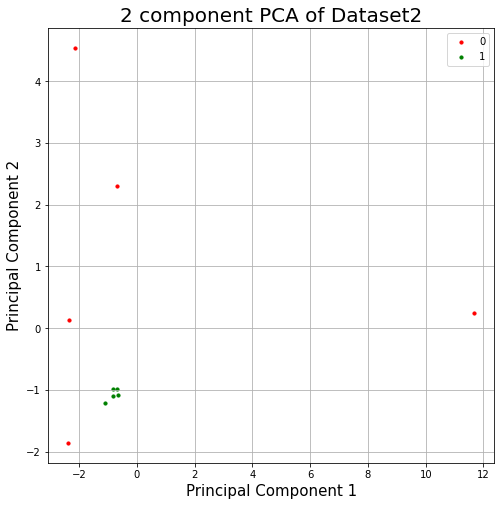

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA of Dataset2', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(data_pca.loc[indicesToKeep, 'PC1']
               , data_pca.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.manifold import TSNE
Xembedded=TSNE(n_components=2,perplexity=30,n_iter=4000,random_state=0).fit_transform(data_pca)

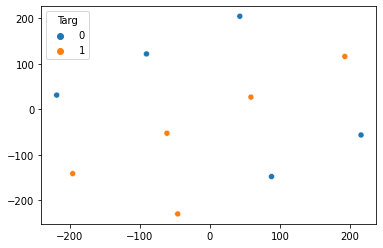

In [ ]:
sns.scatterplot(Xembedded[:,0],Xembedded[:,1],hue=y)
plt.show()